In [15]:
images = os.listdir("./SAMPLE/")
g_images_names = [image for image in images if image.endswith("g.csv")]
ids = [image.split("-")[0] for image in g_images_names]

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df_mass = pd.read_csv(os.path.abspath("./SAMPLE/sample.csv"), sep=';')
df_mass['SDSS_ID'] = df_mass['SDSS_ID'].apply(str)

plotting image :  1237648675066675556-i.csv


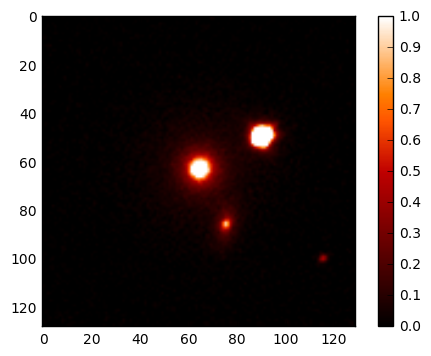

In [18]:
# Read in as pandas dataframe
df_image = pd.read_csv(os.path.abspath("./SAMPLE/" + g_images_names[5]), sep=',')


# Plot an image with a certain scale
print("plotting image : ", images[15])
plt_data = [[float(y) for y in x] for x in df_image.as_matrix()] # convert to matrix
plt.imshow(plt_data, cmap='gist_heat')
plt.colorbar()
plt.clim(0,1) # set Zscale
plt.show()


    CalcMass  Error  TrueMass
0   9.208791  0.058     9.585
1   9.521798  0.040    10.141
2  10.017067  0.032    10.315
3  10.919953  0.014    11.238
4  10.994750  0.029    10.678
CalcMass    float64
Error       float64
TrueMass    float64
dtype: object


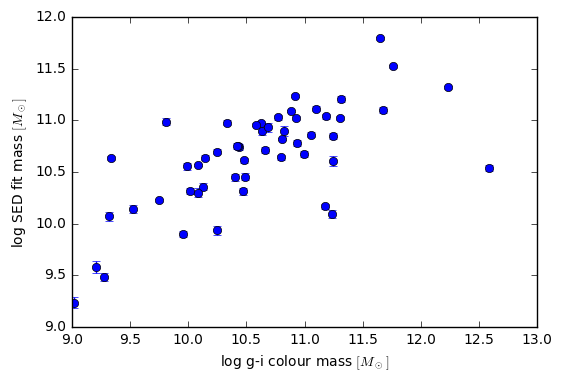

In [19]:
Lsun = 3.846e26 # Solar luminosity in Watt

gi_masses = []
true_masses = []
errors = []

for ID in ids:

    df_g_image = pd.read_csv(os.path.abspath("./SAMPLE/" + ID + "-g.csv"), sep=',')
    df_i_image = pd.read_csv(os.path.abspath("./SAMPLE/" + ID + "-i.csv"), sep=',')

    flux_g = df_g_image.values.sum()  #add all values in the dataframe
    flux_i = df_i_image.values.sum()

    col_gi = -2.5*np.log10(flux_g/flux_i) # calculate the color difference
    logML_g  = -1.197 + 1.431 * col_gi # calculate the mass-to-light ratio
    ML_g     = 10**logML_g

    flux_g_Jy = flux_g * 3.631e-6 # nanomaggies to jansky
    dist = df_mass[df_mass['SDSS_ID'] == ID]['Distance']
    D = dist * 3.086e22 # Megaparsec to meter

    Lg = flux_g_Jy * 1.e-26 * 4.*np.pi*D**2 * 3.e8 / (0.469*1.e-6) / Lsun # flux to solar luminosity

    Mg = ML_g*Lg # Stellar mass in solar masses

    gi_masses.append(float(np.log10(Mg))) # log10 of stellar mass
    true_masses.append(float(df_mass[df_mass['SDSS_ID'] == ID]['logMstar']))
    errors.append(float(df_mass[df_mass['SDSS_ID'] == ID]['err_logMstar']))

df_comparison = pd.DataFrame({"CalcMass": gi_masses,
                              "TrueMass": true_masses,
                              "Error": errors})
print(df_comparison.head())
print(df_comparison.dtypes)
plt.errorbar(df_comparison['CalcMass'], df_comparison['TrueMass'], yerr=df_comparison['Error'], fmt='o')
plt.xlabel('log g-i colour mass $[M_\odot]$')
plt.ylabel('log SED fit mass $[M_\odot]$')
plt.show()


In [20]:
images = np.empty(shape=len(ids), dtype=object)
masses = []
for i in range(0,len(ids)): 
    image = pd.read_csv(os.path.abspath("./SAMPLE/" + g_images_names[i]), sep=',', header=None)
    image = image.values
    image  = image.tolist()
    images[i] = image
    
    mass = meta.loc[meta['SDSS_ID']== int(ids[i]), 'logMstar']
    mass = mass.values
    mass = mass.tolist()
    masses = masses + mass

masses = np.array(masses)

NameError: name 'meta' is not defined

In [ ]:
input_shape = (191, 191, 1)
epochs = 25
batch_size = 500

In [4]:
x_train = images
x_test = images
y_train = masses
y_test = masses

NameError: name 'images' is not defined

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',
              optimizer='rmsprop')

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
         validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)